In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### SEARCH FOR BEST HYPERPARAMETERS USING GRIDSEARCH AND RANDOMFORESTREGRESSOR

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
# CREATE X AND y
y = cars["price"]
X = cars.drop(columns = ["price"])

In [4]:
X = pd.get_dummies(X)

In [5]:
X.shape

(201, 37)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [16]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30, 40, 50] , 'max_depth' :[2,3,4, 6,8]}]

In [17]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 6, 8],
                          'n_estimators': [10, 20, 30, 40, 50]}])

In [18]:
# DISPLAY SCORES
results = grid_search.cv_results_

In [19]:
print(results)

{'mean_fit_time': array([0.01398258, 0.01615167, 0.03109279, 0.03208761, 0.04769177,
       0.01218719, 0.02110906, 0.0279191 , 0.032054  , 0.04063869,
       0.01265035, 0.01582661, 0.04097123, 0.04012494, 0.0471179 ,
       0.00937438, 0.01734948, 0.03790135, 0.0514452 , 0.06346488,
       0.00937042, 0.03131695, 0.03752565, 0.05126123, 0.0535656 ]), 'std_fit_time': array([0.00373128, 0.00884193, 0.01312026, 0.01000983, 0.00896691,
       0.00164283, 0.00221416, 0.00202255, 0.01313651, 0.01252772,
       0.00633197, 0.00025481, 0.00796095, 0.00790311, 0.01376231,
       0.00765415, 0.00218956, 0.01279273, 0.01171195, 0.01038074,
       0.00765092, 0.01402291, 0.00769033, 0.01527599, 0.0122424 ]), 'mean_score_time': array([0.00279908, 0.00627093, 0.0010448 , 0.00491385, 0.00347362,
       0.00251698, 0.00324159, 0.00370188, 0.00942883, 0.00312462,
       0.00029964, 0.0062788 , 0.00312104, 0.00453844, 0.00641518,
       0.0037231 , 0.00368104, 0.00313745, 0.        , 0.00312452,
     

In [20]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8335897368550225 {'max_depth': 2, 'n_estimators': 10}
0.8236911421893863 {'max_depth': 2, 'n_estimators': 20}
0.8361284091598424 {'max_depth': 2, 'n_estimators': 30}
0.828493563540883 {'max_depth': 2, 'n_estimators': 40}
0.8278928719080257 {'max_depth': 2, 'n_estimators': 50}
0.8383729571847935 {'max_depth': 3, 'n_estimators': 10}
0.8294497635311753 {'max_depth': 3, 'n_estimators': 20}
0.848959169344789 {'max_depth': 3, 'n_estimators': 30}
0.8419294048276909 {'max_depth': 3, 'n_estimators': 40}
0.8366190348937088 {'max_depth': 3, 'n_estimators': 50}
0.8335251046150312 {'max_depth': 4, 'n_estimators': 10}
0.8427471589615116 {'max_depth': 4, 'n_estimators': 20}
0.8538005702708862 {'max_depth': 4, 'n_estimators': 30}
0.8579839964234024 {'max_depth': 4, 'n_estimators': 40}
0.8553719465869974 {'max_depth': 4, 'n_estimators': 50}
0.8366894986859628 {'max_depth': 6, 'n_estimators': 10}
0.8621693970206245 {'max_depth': 6, 'n_estimators': 20}
0.860104558706199 {'max_depth': 6, 'n_estimators':

In [21]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 40}

In [22]:
grid_search.best_score_

0.8627475196331984

In [23]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=40)

### BULID MODEL WITH BEST ESTIMATOR

In [24]:
model = grid_search.best_estimator_

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [27]:
mse = mean_squared_error(y_test, y_pred)

In [28]:
r2_score(y_test, y_pred)

0.9334902847007024

In [29]:
mse

5864419.088659884

In [30]:
np.sqrt(mse)

2421.656269717047

<AxesSubplot:ylabel='price'>

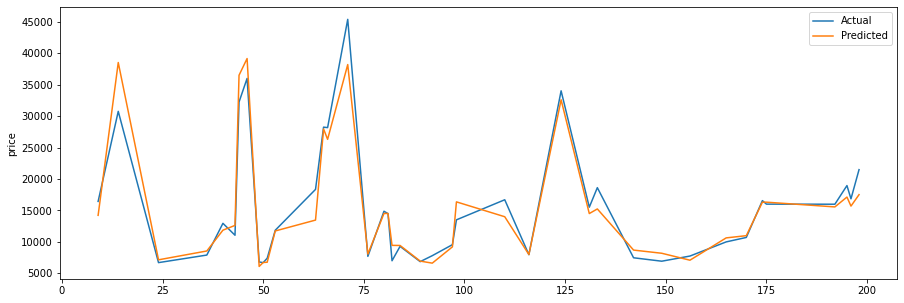

In [34]:
# COMPARE ACTUAL AND PREDICTED VALUES USING LINEGRAPH
plt.gcf().set_size_inches(15, 5)
sns.lineplot(x = X_test.index, y = y_test, label = "Actual")
sns.lineplot(x = X_test.index, y = y_pred, label = "Predicted")